In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats

In [31]:
df = pd.read_csv('AllResistanceGenes.csv')

In [32]:
ARGChro=np.zeros(np.size(df,0))
BioChro=np.zeros(np.size(df,0))
ARGPlas=np.zeros(np.size(df,0))
BioPlas=np.zeros(np.size(df,0))
PlasTotal=np.zeros(np.size(df,0))
PlasNum=np.zeros(np.size(df,0))
for i in range(np.size(df,0)):
    ARGChro[i]=df.Antimicrobial_resistance_chromosome[i]
    BioChro[i]=df.biofilm_chromosome[i]
    ARGPlas[i]=df.Antimicrobial_resistance_plasmid[i]
    BioPlas[i]=df.biofilm_plasmid[i]
    PlasTotal[i]=df.plasmid_total_size[i]
    PlasNum[i]=df.plasmid_count[i]

In [33]:
def countzeros(x):
    n=0
    for i in range(len(x)):
        if x[i]==0:
            n=n+1
    return n

In [34]:
ARG_0C=np.zeros(50)
ARG_1C=np.zeros(50)
ARG_0P=np.zeros(50)
ARG_1P=np.zeros(50)
ARG_0G=np.zeros(50)
ARG_1G=np.zeros(50)

for i in range(50):
    x0P=[]
    x1P=[]
    x0C=[]
    x1C=[]
    x0G=[]
    x1G=[]
    print(i)
    for j in range(len(BioChro)):
        if BioPlas[j]+BioChro[j]>0:
            x1G.append(df.iloc[j,i+1+50]+df.iloc[j,i+1])
            x1P.append(df.iloc[j,i+1+50])
            x1C.append(df.iloc[j,i+1])
        else:
            x0G.append(df.iloc[j,i+1+50]+df.iloc[j,i+1])
            x0P.append(df.iloc[j,i+1+50])
            x0C.append(df.iloc[j,i+1])
    ARG_0P[i]=1-countzeros(x0P)/len(x0P)
    ARG_1P[i]=1-countzeros(x1P)/len(x1P)
    ARG_0C[i]=1-countzeros(x0C)/len(x0C)
    ARG_1C[i]=1-countzeros(x1C)/len(x1C)
    ARG_0G[i]=1-countzeros(x0G)/len(x0G)
    ARG_1G[i]=1-countzeros(x1G)/len(x1G)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


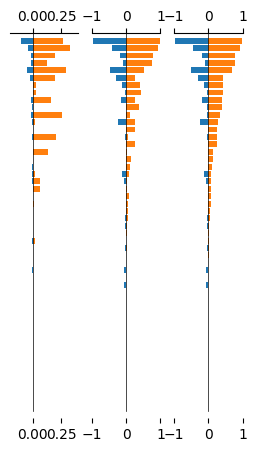

In [35]:
plt.figure(figsize=(3,5))
III=np.argsort(ARG_1G)
plt.subplot(1,3,1)
plt.barh(np.arange(1,51,1),-ARG_0P[III])
plt.barh(np.arange(1,51,1),ARG_1P[III])
plt.ylim(-1,51)
plt.plot([0,0],[0,51],'-',color='black',linewidth=0.5)
for pos in ['left', 'right','bottom']: 
    plt.gca().spines[pos].set_visible(False) 
#plt.xticks([])
plt.tick_params(left=False, labelleft=False, top=True, labeltop=True,direction='out')
plt.xlim(-0.2,0.4)

plt.subplot(1,3,2)
plt.barh(np.arange(1,51,1),-ARG_0C[III])
plt.barh(np.arange(1,51,1),ARG_1C[III])
plt.ylim(-1,51)
plt.plot([0,0],[0,51],'-',color='black',linewidth=0.5)
for pos in ['left', 'right','bottom']: 
    plt.gca().spines[pos].set_visible(False) 
#plt.xticks([])
plt.tick_params(left=False, labelleft=False, top=True, labeltop=True,direction='out')
plt.xlim(-1,1)

plt.subplot(1,3,3)
plt.barh(np.arange(1,51,1),-ARG_0G[III])
plt.barh(np.arange(1,51,1),ARG_1G[III])
plt.ylim(-1,51)
plt.plot([0,0],[0,51],'-',color='black',linewidth=0.5)
for pos in ['left', 'right','bottom']: 
    plt.gca().spines[pos].set_visible(False) 
#plt.xticks([])
plt.tick_params(left=False, labelleft=False, top=True, labeltop=True,direction='out')
plt.xlim(-1,1)
plt.savefig('ResistanceGenesByTypes2.pdf')


In [37]:
dfn = pd.read_csv('ResistanceNames.csv')
IIID=np.argsort(ARG_1G)[::-1]
ASDF=dfn.iloc[IIID,0]
ASDF.to_csv("ResistanceNamesSort.csv")